In [88]:
# Import libraries
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import db_queries
#print(db_queries.get_ref_id('Mario Yamasaki'))

# connect to database
import os
# get filepath to database
parent_dir = os.path.dirname(os.getcwd())
db_filepath = parent_dir + r'\ufc_db.db'
# connect to database (not needed for now)
db_connection = sqlite3.connect(db_filepath)
cursor = db_connection.cursor()

### SELECT ALL FIGHT DATA

In [89]:
# select all fights (date + *)
query = "SELECT fights.id, events.date, fighter_1_name, fighter_2_name, fighter_1_result, fighter_2_result, weightclass, scheduled_rds, ending_rd, ending_time_min, ending_time_sec, win_method FROM events JOIN fights ON events.id = fights.event_id;"
list_of_fights = cursor.execute(query).fetchall()

# print check

for i, fight in enumerate (list_of_fights):
  print(fight)
  if i == 3:
    break

(1, '23/Feb/2001', 'Sean Sherk', 'Tiki Ghosn', 'W', 'L', 'Welterweight', 2, 2, 4, 47, 'Submission')
(2, '23/Feb/2001', 'Phil Baroni', 'Curtis Stout', 'W', 'L', 'Middleweight', 2, 2, 5, 0, 'Decision - Unanimous')
(3, '23/Feb/2001', 'Bobby Hoffman', 'Mark Robinson', 'NC', 'NC', 'Heavyweight', 2, 1, 3, 27, 'Overturned')
(4, '23/Feb/2001', 'Pedro Rizzo', 'Josh Barnett', 'W', 'L', 'Heavyweight', 3, 2, 4, 21, 'KO/TKO')


In [90]:
# get fight stats (for both fighters) for each fight
all_fight_details = []

for fight in list_of_fights:
  # create a dictionary to hold data
  dictionary = dict()
  dictionary['fight_info'] = fight
  
  # get both fighters' fight data 
  query = "SELECT * FROM fight_stats WHERE fight_id = ? AND round = 0;"
  param = [fight[0]]
  data_both_fighters = cursor.execute(query, param).fetchall()
  
  # get fighter 1 name + format list
  query = "SELECT name FROM fighters WHERE id = ?;"
  param = [data_both_fighters[0][0]]
  fighter_1_name = cursor.execute(query, param).fetchone()[0]
  f1_list = [x for x in data_both_fighters[0]]
  f1_list.insert(0, fighter_1_name)
  
  # get fighter 2 name + format list
  query = "SELECT name FROM fighters WHERE id = ?;"
  param = [data_both_fighters[1][0]]
  fighter_2_name = cursor.execute(query, param).fetchone()[0]
  f2_list = [x for x in data_both_fighters[1]]
  f2_list.insert(0, fighter_2_name)
  
  # append dictionary to whole list
  dictionary['fighter_1_data'] = f1_list
  dictionary['fighter_2_data'] = f2_list
  all_fight_details.append(dictionary)
  

# print check
'''
for fight in all_fight_details:
  for key, value in fight.items():
    print(key, value)
  print('\n' *2)
'''

"\nfor fight in all_fight_details:\n  for key, value in fight.items():\n    print(key, value)\n  print('\n' *2)\n"

##### Analysis: Finishes by weightclass

In [96]:
# init weightclasses and dicts for finishes
wcs = ['Flyweight', 'Bantamweight', 'Featherweight', 'Lightweight', 'Welterweight', 'Middleweight',
'LightHeavyweight', 'Heavyweight', 'W Strawweight', 'W Flyweight', 'W Bantamweight', 'W Featherweight', 'CatchWeight']

weightclass_win_methods = []

for weight in wcs:
  dictionary = {'total fights': 0, 'finish': 0, 'TKO_KO': 0, 'submission': 0, 'decision': 0}
  weightclass_win_methods.append(dictionary)
  
# loop through fights (get weightclasses and finishes)
for fight in list_of_fights:
  # get index of weightclass
  index = wcs.index(fight[6])

  # add 1 to total fights for that weight
  weightclass_win_methods[index]['total fights'] += 1
  
  # check finishing method
  if (fight[11] in ['KO/TKO',"TKO - Doctor'sStoppage",'CouldNotContinue']):
    weightclass_win_methods[index]['TKO_KO'] += 1
    weightclass_win_methods[index]['finish'] += 1
  
  elif (fight[11] == 'Submission'):
    weightclass_win_methods[index]['submission'] += 1
    weightclass_win_methods[index]['finish'] += 1

  elif ('Decision' in fight[11]):
    weightclass_win_methods[index]['decision'] += 1
    
# print check
'''
for i in weightclass_win_methods:
  print(i)
'''

{'total fights': 275, 'finish': 119, 'TKO_KO': 62, 'submission': 57, 'decision': 155}
{'total fights': 577, 'finish': 284, 'TKO_KO': 166, 'submission': 118, 'decision': 285}
{'total fights': 646, 'finish': 280, 'TKO_KO': 176, 'submission': 104, 'decision': 360}
{'total fights': 1175, 'finish': 602, 'TKO_KO': 333, 'submission': 269, 'decision': 566}
{'total fights': 1176, 'finish': 602, 'TKO_KO': 387, 'submission': 215, 'decision': 560}
{'total fights': 887, 'finish': 519, 'TKO_KO': 327, 'submission': 192, 'decision': 359}
{'total fights': 628, 'finish': 386, 'TKO_KO': 281, 'submission': 105, 'decision': 230}
{'total fights': 585, 'finish': 403, 'TKO_KO': 323, 'submission': 80, 'decision': 174}
{'total fights': 248, 'finish': 81, 'TKO_KO': 30, 'submission': 51, 'decision': 166}
{'total fights': 179, 'finish': 72, 'TKO_KO': 34, 'submission': 38, 'decision': 107}
{'total fights': 177, 'finish': 71, 'TKO_KO': 45, 'submission': 26, 'decision': 105}
{'total fights': 25, 'finish': 13, 'TKO_KO

In [92]:
# set x
x_axis_weightclass = ['Fly', 'Ban', 'Ftr', 'Lig', 'Wel', 'Mid', 'LHW', 'HW', 'W Str', 'W Fly', 'W Ban', 'W Ftr', 'CatchW']

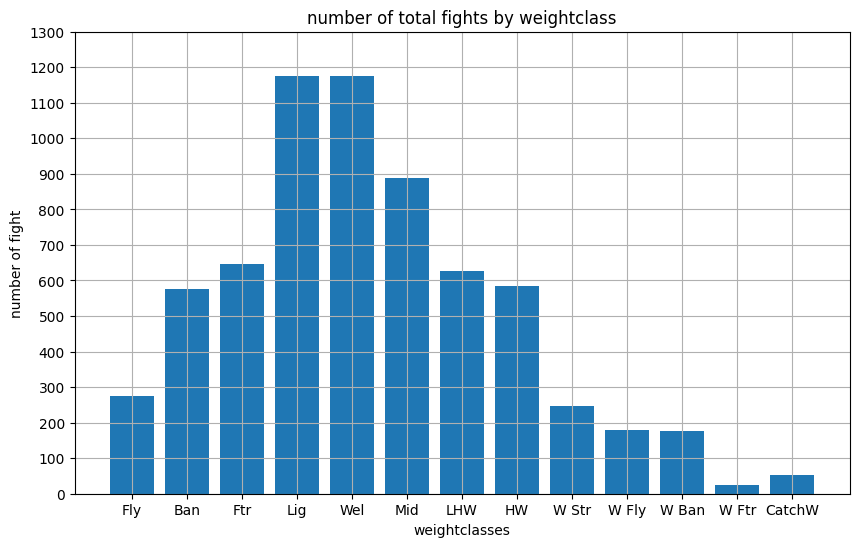

In [136]:
# plot number of fights by each weight
y_axis_num_fights = [weight['total fights'] for weight in weightclass_win_methods]

# plot bar chart
plt.figure(figsize = (10, 6))

plt.bar(x_axis_weightclass, y_axis_num_fights, align='center')
plt.xlabel('weightclasses')
plt.ylabel('number of fight')
plt.title('number of total fights by weightclass')
plt.grid(True)

y_axis_ticks = [0, 1300]
plt.yticks(np.arange(min(y_axis_ticks), max(y_axis_ticks)+1, 100))
plt.show()


In [137]:
# (pt 1/2) Plot finishes, KO/TKOS, Subs, Decs by weightclass (each as a % of total fights in weightclass)

# init vars to hold data lists
finishes, ko_tko, subs, decs = ([0 for i in range(len(x_axis_weightclass))] for x in range(4))

# print check
# print(f'{finishes}\n{ko_tko}\n{subs}\n{decs}')

# loop through weightclass_win_methods and put data in list. Use enumerate to match weightclasses
for i, weight in enumerate(weightclass_win_methods):
  finishes[i] = round((weight['finish']/weight['total fights'])*100)
  ko_tko[i] = round((weight['TKO_KO']/weight['total fights'])*100)
  subs[i] = round((weight['submission']/weight['total fights'])*100)
  decs[i] = round((weight['decision']/weight['total fights'])*100)
  
# print check
# print(f'{finishes}\n{ko_tko}\n{subs}\n{decs}')

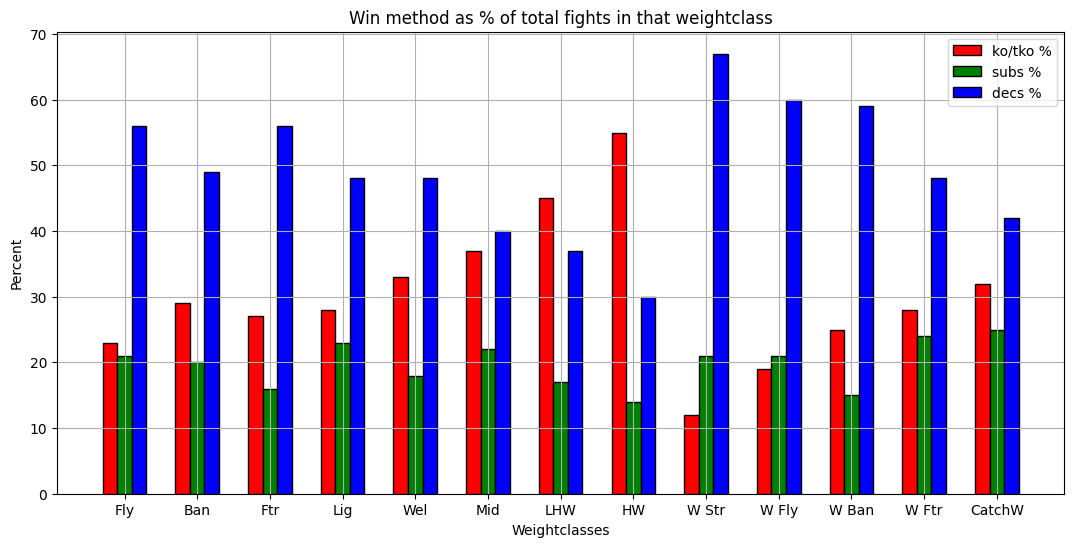

In [138]:
# (pt 2/2) Plot KO/TKOS + Subs + Decs (each as a % of total fights in weightclass)
x_axis = np.arange(len(x_axis_weightclass))

plt.figure(figsize = (13, 6))

bar_width = 0.2
plt.bar(x_axis - bar_width, ko_tko, bar_width, color = 'r', edgecolor = 'k', label = 'ko/tko %')
plt.bar(x_axis, subs, bar_width, color = 'g',  edgecolor = 'k', label = 'subs %')
plt.bar(x_axis + bar_width, decs, bar_width, color = 'b', edgecolor = 'k', label = 'decs %')

plt.xticks(x_axis, x_axis_weightclass)
plt.xlabel('Weightclasses')
plt.ylabel('Percent')
plt.title(r'Win method as % of total fights in that weightclass')
plt.grid(True)
plt.legend()

#plt.annotate('1) Finish % = ko/tko % + subs %', weight='bold', xy = (-0.8, 68))
#plt.annotate('2) ko + subs + dec makes up ~ 100%', weight='bold', xy = (-0.8, 65))

plt.show()

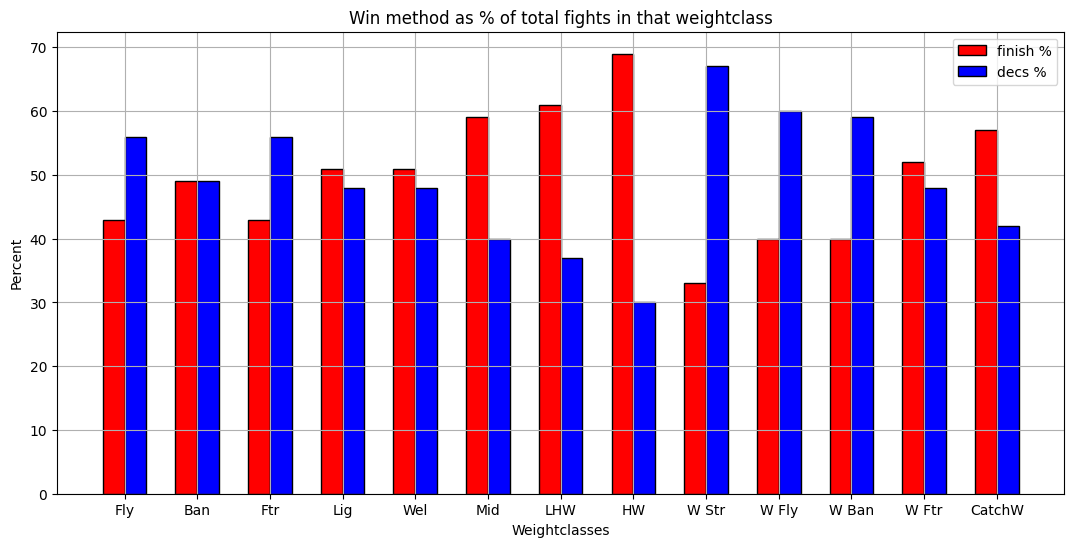

In [139]:
# (pt 2/2) Plot finishes + Decs (each as a % of total fights in weightclass)
x_axis = np.arange(len(x_axis_weightclass))

plt.figure(figsize = (13, 6))

bar_width = 0.3
plt.bar(x_axis - 0.15, finishes, bar_width, color = 'r', edgecolor = 'k', label = 'finish %')
plt.bar(x_axis + 0.15, decs, bar_width, color = 'b', edgecolor = 'k', label = 'decs %')

plt.xticks(x_axis, x_axis_weightclass)
plt.xlabel('Weightclasses')
plt.ylabel('Percent')
plt.title(r'Win method as % of total fights in that weightclass')
plt.grid(True)
plt.legend()

plt.show()